# **Data Preprocessing**

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

**Reading the dataset**

In [4]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test (1).csv


In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

**Exploratory Data Analysis**

In [9]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [10]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [12]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

**Checking for Null Values**

In [13]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

**Reading and Merging .csv files**

In [17]:
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [18]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")

In [19]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Unnamed: 5
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,NaN
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,NaN
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,NaN
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,NaN
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,NaN


**Dropping Columns**

In [20]:
trainfinal=trainfinal.drop(['center_id','meal_id'],axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Unnamed: 5
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,NaN
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,NaN
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,NaN
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,NaN
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,NaN


In [21]:
cols=trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area', 'Unnamed: 5']


In [22]:
cols=cols[:2]+cols[9:]+cols[7:9]+cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'Unnamed: 5', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [23]:
trainfinal=trainfinal[cols]

In [24]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
Unnamed: 5               float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

**Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lb1=LabelEncoder()
trainfinal['center_type']=lb1.fit_transform(trainfinal['center_type'])
lb2=LabelEncoder()
trainfinal['category']=lb1.fit_transform(trainfinal['category'])
lb1=LabelEncoder()
trainfinal['cuisine']=lb1.fit_transform(trainfinal['cuisine'])

In [27]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,Unnamed: 5,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,NaN,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,NaN,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,NaN,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,NaN,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,NaN,0,3,146.50,147.50,0,0,215


In [28]:
trainfinal.shape

(456548, 14)

**Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'num_orders Distribution')

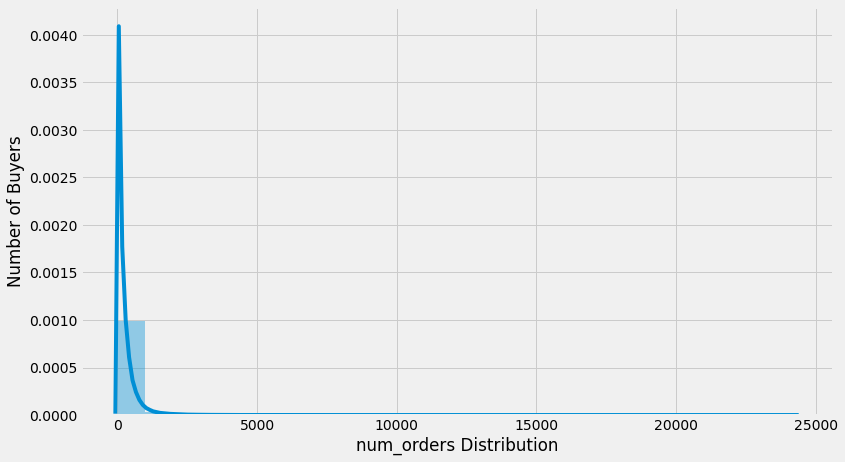

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sb.distplot(trainfinal.num_orders,bins=25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.xlabel("num_orders Distribution")

In [30]:
trainfinal2=trainfinal.drop(['id'],axis=1)
correlation=trainfinal2.corr(method='pearson')
columns=correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

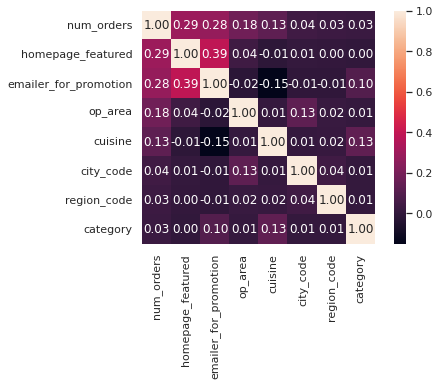

In [31]:
correlation_map=np.corrcoef(trainfinal[columns].values.T)
sb.set(font_scale=1.0)
heatmap=sb.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

**Splitting the dataset into Dependent and Independent variables**

In [32]:
features=columns.drop(['num_orders'])
trainfinal3=trainfinal[features]
x=trainfinal3.values
y=trainfinal['num_orders'].values

In [33]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


**Split the Dataset into Train and Test Set**

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(x,y,test_size=0.25)

**Model Building**

**Train and Test Model Algorithms**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 129.0034122013798


In [37]:
L=Lasso()
L.fit(x_train,y_train)
y_pred=LR.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 129.0034122013798


In [38]:
EN=ElasticNet()
EN.fit(x_train,y_train)
y_pred=EN.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 130.67395920406418


In [39]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 62.85258748656859


In [40]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 66.934119819693


In [41]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
y_pred=GB.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 98.13731815769488


**Save the Model**

In [42]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

**Predicting the output using the model**

In [43]:
testfinal=pd.merge(test,meal_info, on="meal_id", how="outer")
testfinal=pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal=testfinal.drop(['meal_id','center_id'],axis=1)
tcols=testfinal.columns.tolist()
tcols=tcols[:2]+tcols[8:]+tcols[6:8]+tcols[2:6]
testfinal=testfinal[tcols]
lb1=LabelEncoder()
testfinal['center_type']=lb1.fit_transform(testfinal['center_type'])
lb2=LabelEncoder()
testfinal['category']=lb1.fit_transform(testfinal['category'])
lb1=LabelEncoder()
testfinal['cuisine']=lb1.fit_transform(testfinal['cuisine'])
x_test=testfinal[features].values

In [44]:
pred=DT.predict(x_test)
pred[pred<0]=0
submit=pd.DataFrame({'id':testfinal['id'],'num_orders':pred})

In [45]:
submit.to_csv("submission.csv",index=False)
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.788519
std,1.441580e+05,366.894816
min,1.000085e+06,15.446429
25%,1.123969e+06,64.892430
50%,1.247296e+06,145.723684
75%,1.372971e+06,323.404984
max,1.499996e+06,6124.523810
